<a href="https://colab.research.google.com/github/Mpitsiali/MAI645_as1/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# TODO: Enter the foldername in your Drive where you have saved the unzipped
FOLDERNAME = '/content/drive/MyDrive/MAI645'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

In [ ]:
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train
y_train = y_train

x_test = x_test[:1000]
y_test = y_test[:1000]

print('Train: ', x_train.shape)
print('Test: ', np.unique(y_train))

11490434/11490434 [==============================] - 0s 0us/step
Train:  (60000, 28, 28)
Test:  [0 1 2 3 4 5 6 7 8 9]


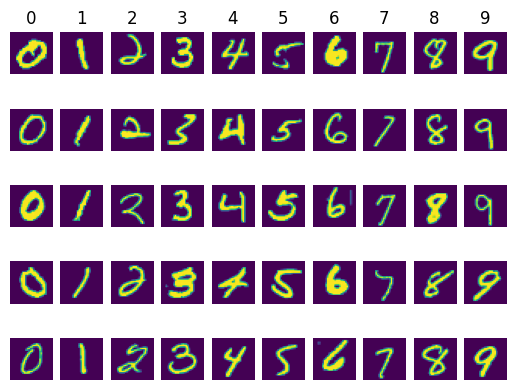

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.random.mtrand import noncentral_chisquare


class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network. The net has an input dimension of
    N, a hidden layer dimension of H, and performs classification over C classes.
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.

    In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - softmax

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, lr, std=1e-4):
        """

        A two-layer fully-connected neural network with ReLU nonlinearity and
        softmax loss

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
       #############################################################################
       # TODO: Initialize network weight and learning rate                         #
       # Weights are initialized with a value between 0-1                          #
       # Biases are initialize to zero                                             #
       #############################################################################

        self.W1 = None
        self.b1 = None

        self.W2 = None
        self.b2 = None

        self.lr = None

        #############################################################################
        #                              END OF YOUR CODE                             #
        #############################################################################

        self.W1 *= std
        self.W2 *= std

    def forward(self, X, y=None):


        #############################################################################
        # TODO: Perform the forward pass, computing the class scores for the input. #
        # Store the result in the output variable, which should be an array of      #
        # shape (N, C), C is the number of classes.                                 #
        #############################################################################
        # Compute the forward pass
        # Reshape input to shape (N, D)
        self.X = None

        # 1st linear layer
        self.hidden_layer = None

        # ReLu activation
        self.hidden_layer = None

        # 2nd linear layer
        output = None

        #############################################################################
        #                              END OF YOUR CODE                             #
        #############################################################################

        return output

    def softmax_loss(self, scores, y, reg=0.1):

        N = scores.shape[0]

        scores = scores - np.max(scores)
        #############################################################################
        # Compute the softmax loss. Store the result in the variable loss,          #
        # which should be a scalar. Return also the variable probs with shape (H,C) #
        # where we store the retult prior to the logarithm operation of softmax loss#
        #############################################################################

        # apply exponential function on score values
        exp_scores = None

        # Compute the probabilities for each class given the exp scores
        probs = None

        # Compute the negative logarithm of the correct class
        class_logprobs = None

        # Accumulate logprobs and divide by the number of samples
        data_loss = None

        ###############################################################################
        #                              END OF YOUR CODE                               #
        ###############################################################################

        reg_loss = reg * np.sum(self.W1 **2) + reg * np.sum(self.W2 **2)
        loss = data_loss + reg_loss
        return loss, probs

    def backward(self, probs, y, reg=0.1):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C. This parameter is optional; if it
          is not passed then we only return scores, and if it is passed then we
          instead return the loss and gradients.
        - reg: Regularization strength.

        Returns:

        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """

        grads = {}
        N = probs.shape[0]

        dscores = probs
        dscores[range(N), y] -= 1
        dscores /= N

        grads['W2'] = np.dot(self.hidden_layer.T, dscores)
        grads['b2'] = np.sum(dscores, axis=0, keepdims=True)

        dhidden = np.dot(dscores, self.W2.T)
        dhidden[self.hidden_layer <= 0] = 0

        grads['W1'] = np.dot(self.X.T, dhidden)
        grads['b1'] = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        grads['W2'] += reg * self.W2
        grads['W1'] += reg * self.W1

        return grads

    def step(self, grads):

        #########################################################################
        # TODO: Use the gradients in the grads dictionary to update the         #
        # parameters of the network (stored in the dictionary self.W1, self.W2, #
        # self.b1, self.b2)                                                     #
        # using stochastic gradient descent. You'll need to use the gradients   #
        # stored in the grads dictionary defined above.                         #
        #########################################################################
        self.W2 += None
        self.b2 += None
        self.W1 += None
        self.b1 += None
        #########################################################################
        #                             END OF YOUR CODE                          #
        #########################################################################


    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """
        y_pred = None

        ###########################################################################
        # TODO: Implement this predict function                                   #
        ###########################################################################

        ###########################################################################
        #                              END OF YOUR CODE                           #
        ###########################################################################

        return y_pred


In [ ]:
hidden_layer_size = 50
learning_rate = 0.001

input_channels = 28 * 28
output_channels = 10
# Initialize the Network. Fill the __init__ function on neural_net.py
net = TwoLayerNet(input_channels, hidden_layer_size, output_channels, learning_rate)

# Training Loop
num_iters = 5000
indices = x_train.shape[0]
batch_size = 32
loss_acum = 0
loss_it = []
loss_log = 10
for it in range(num_iters):
  #########################################################################
  # TODO: Create a random minibatch of training data and labels, storing  #
  # them in X_batch and y_batch respectively. Use np.random.choice        #
  #########################################################################
  X_batch = None
  y_batch = None
  #########################################################################
  #                             END OF YOUR CODE                          #
  #########################################################################

  # Forward Pass
  out = net.forward(X_batch)

  # Compute Loss
  loss, probs = net.softmax_loss(out, y_batch)

  # Compute Gradients
  grads = net.backward(probs, y_batch)

  # Update weights
  net.step(grads)

  loss_acum += loss
  if (it % loss_log) == 0 and it != 0:
    print('Iteration '+str(it)+' : '+str(loss_acum/loss_log))
    loss_it.append(loss_acum/loss_log)
    loss_acum = 0
  elif it==0:
    print('Iteration '+str(it)+' : '+str(loss_acum))
    loss_it.append(loss_acum)



In [ ]:
import matplotlib.pyplot as plt
#############################################################################
# TODO: Plot the training loss curve(use matplotlib).                       #
# You can use 'loss_it' list                                                #
#############################################################################


#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################


In [ ]:
correct_count = 0
for index in range(x_test.shape[0]):
  img = x_test[index]
  target = y_test[index]

  #############################################################################
  # TODO: Compute the model's accuracy (run net.predict function)             #
  #############################################################################

  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

print('Accuracy = ', correct_count/x_test.shape[0])

In [ ]:
#############################################################################
# TODO: Display the predicted classes and the images for the first          #
# 10 test samples                                                           #
#############################################################################



#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
